## Atividade 2

Tendo como referência a imagem de uma nota fiscal (no repositório, “imagens/nota-fiscal.png”), realize alguma transformação de tal forma que fique somente o boleto na imagem, sem o background, ajustando sua perspectiva.

Como dito em sala, essa operação é bastante similar à utilizada em aplicações de escaneamento de documentos.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Faça upload da imagem se utilizando do seguinte snippet de código:

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Usuario fez upload da imagem "{name}" com tamanho {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving nota-fiscal.png to nota-fiscal.png
Usuario fez upload da imagem "nota-fiscal.png" com tamanho 308872 bytes


Importação das bibliotecas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

/tmp/ipykernel_8009/344068320.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 2. Solução

Text(0.5, 1.0, 'Original')

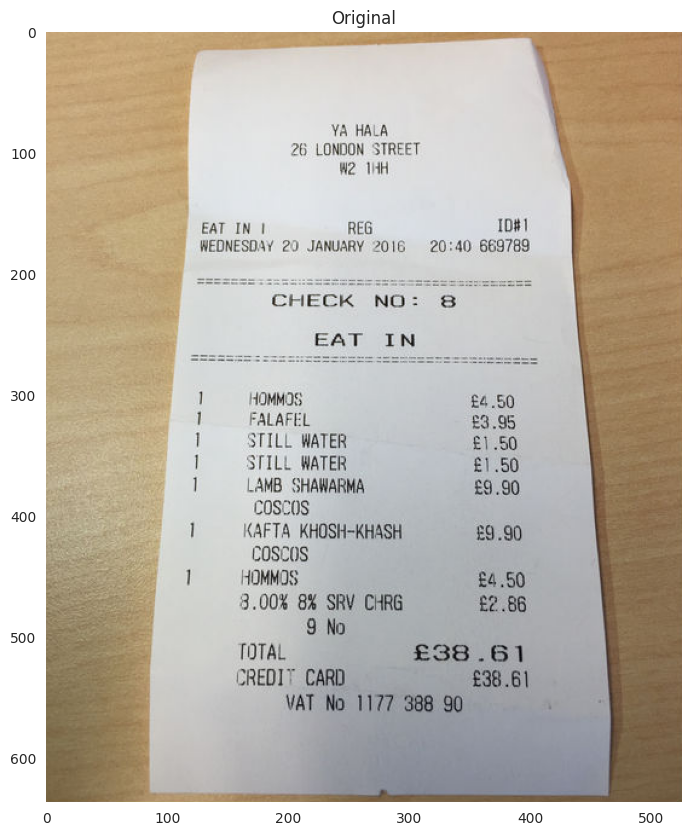

In [2]:
imagem = cv2.imread("nota-fiscal.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Original")

Text(0.5, 1.0, 'Boleto com Marcadores')

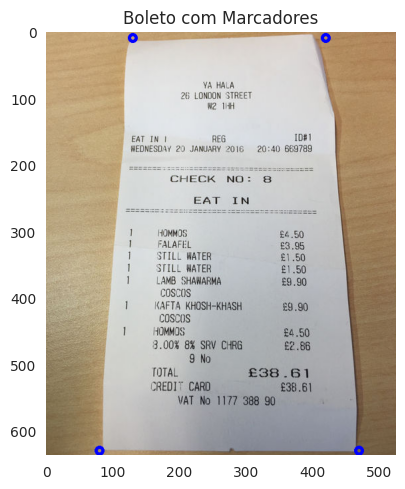

In [10]:
# IMPLEMENTAR

imagem_marcadores = imagem.copy()

p1 = (130,10)
p2 = (420, 10)
p3 = (80, 630)
p4 = (470, 630)

tamanho_final = (470, 630)

pontos_marcadores = np.float32([p1,p2,p3,p4])
pontos_destino = np.float32([(0,0),(tamanho_final[0],0),(0,tamanho_final[1]),tamanho_final])

# Adicionando marcadores para visualizar os pontos que serão expandidos

cv2.circle(imagem_marcadores, p1, 5, (0, 0, 255), 3)
cv2.circle(imagem_marcadores, p2, 5, (0, 0, 255), 3)
cv2.circle(imagem_marcadores, p3, 5, (0, 0, 255), 3)
cv2.circle(imagem_marcadores, p4, 5, (0, 0, 255), 3)

plt.imshow(imagem_marcadores)
plt.title("Boleto com Marcadores")

Text(0.5, 1.0, 'Portal com Marcadores')

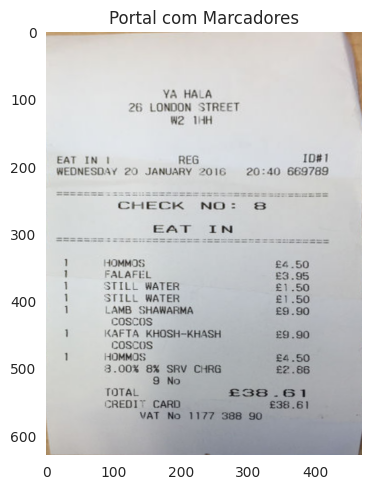

In [11]:
matriz_perspectiva = cv2.getPerspectiveTransform(pontos_marcadores, pontos_destino)
imagem_transformada = cv2.warpPerspective(imagem, matriz_perspectiva, tamanho_final)

plt.imshow(imagem_transformada)
plt.title("Portal com Marcadores")